# Airline Passenger Satisfaction
<img src="https://drive.google.com/uc?id=1HvDJElliYQKbdyiCQXsoKdjC8KefRoSL" alt="aitplane in the skies" style="width:500px;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipydatagrid
import seaborn as sns
import bqplot as bqp

In [2]:
airlines_df = pd.read_csv("airline_passenger_satisfaction.csv")

Exploratory Data Analysis

In [3]:
# Quick overview of the columns and their types
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
# Summary statistics
airlines_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


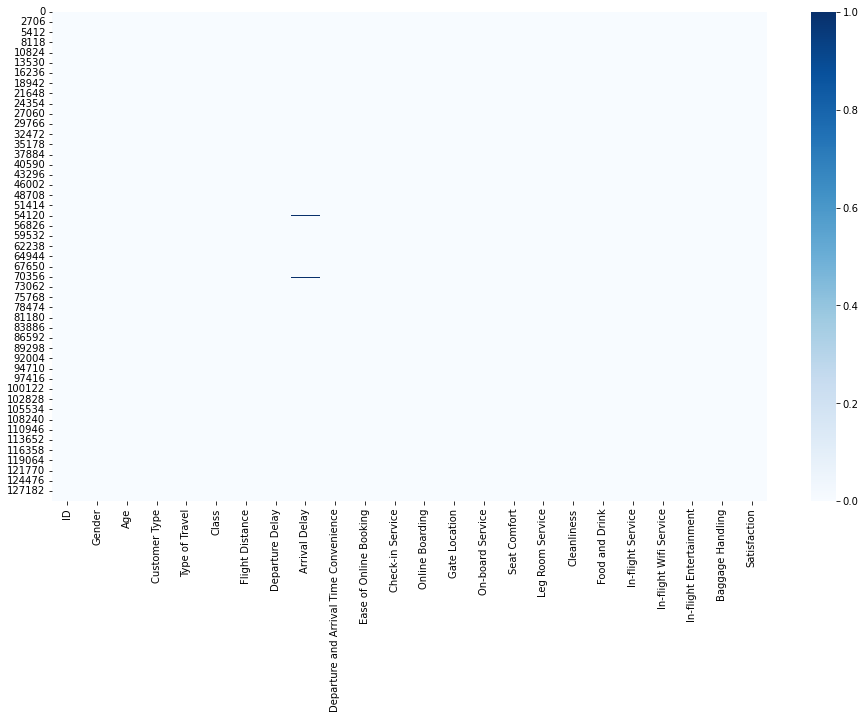

In [5]:
# Checking for NaN values
plt.figure(figsize=(16,9))
sns.heatmap(airlines_df.isna().astype(int), cmap='Blues');

In [6]:
airlines_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [7]:
# Examine data with null values
airlines_df[airlines_df['Arrival Delay'].isnull()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


Given we have only 393 rows with NaN for Arrival Delay, we can probably drop all NaN rows without much impact on the overall analysis

In [8]:
airlines_df.dropna(inplace=True)

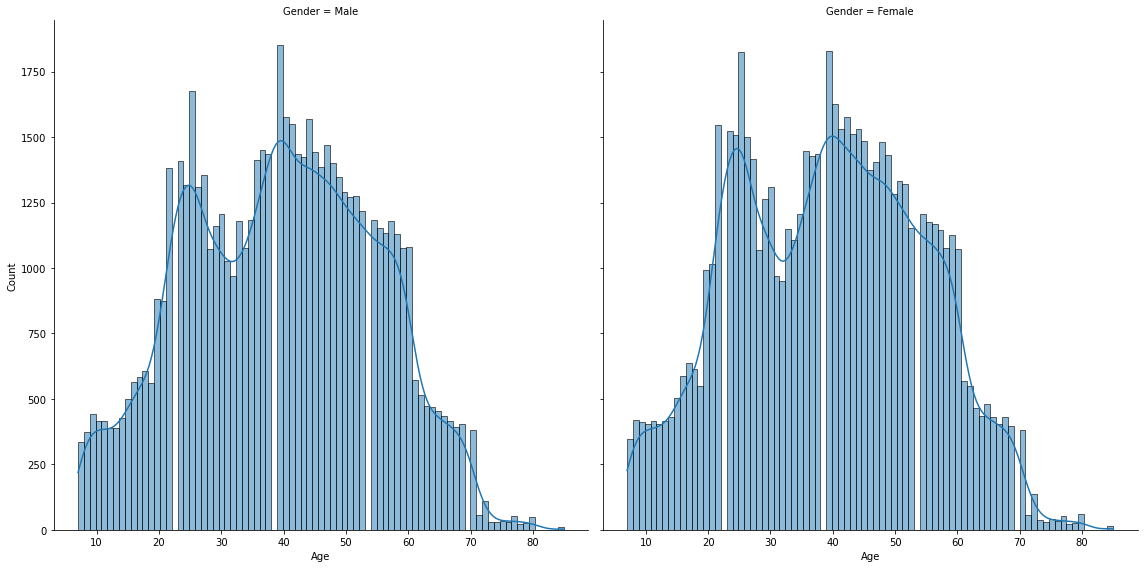

In [9]:
# Distribution of ages by gender
sns.displot(airlines_df, x='Age', kind='hist', col='Gender', kde=True, height=8, aspect=1);

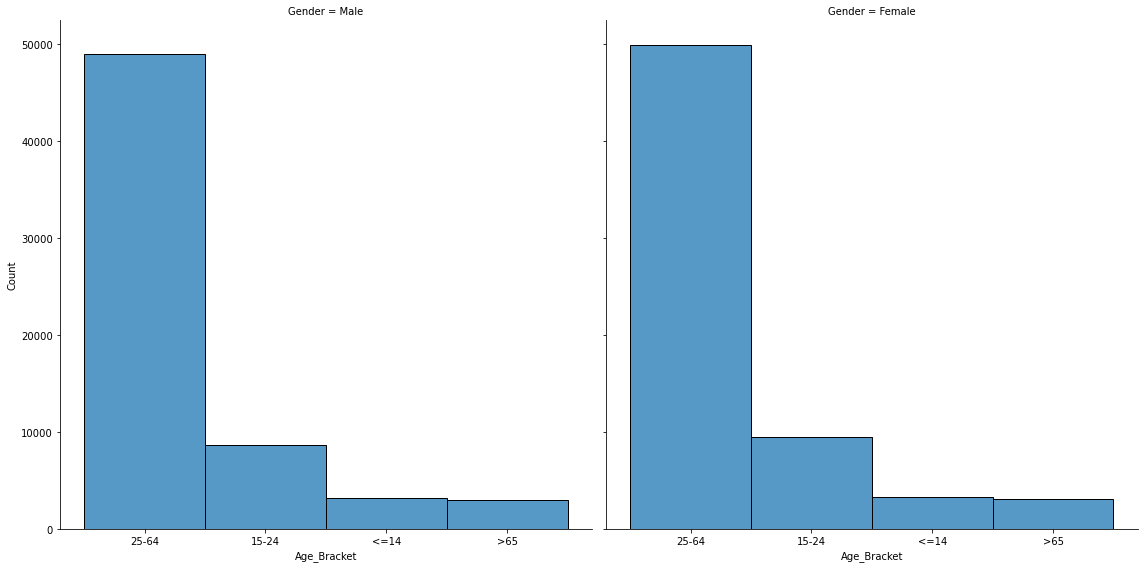

In [10]:
# Age by bracket
def get_age_bracket(age):
    if age <= 14:
        return "<=14"
    elif age >= 15 and age <= 24:
        return "15-24"
    elif age >=25 and age <= 64:
        return "25-64"
    else:
        return ">65"
airlines_df['Age_Bracket'] = airlines_df["Age"].apply(get_age_bracket)
sns.displot(airlines_df, x='Age_Bracket', kind='hist', col='Gender', kde=False, height=8, aspect=1);

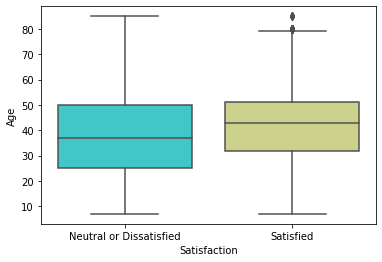

In [11]:
# Relationship between satisfaction and age
sns.boxplot(data=airlines_df, x="Satisfaction", y="Age", palette="rainbow");

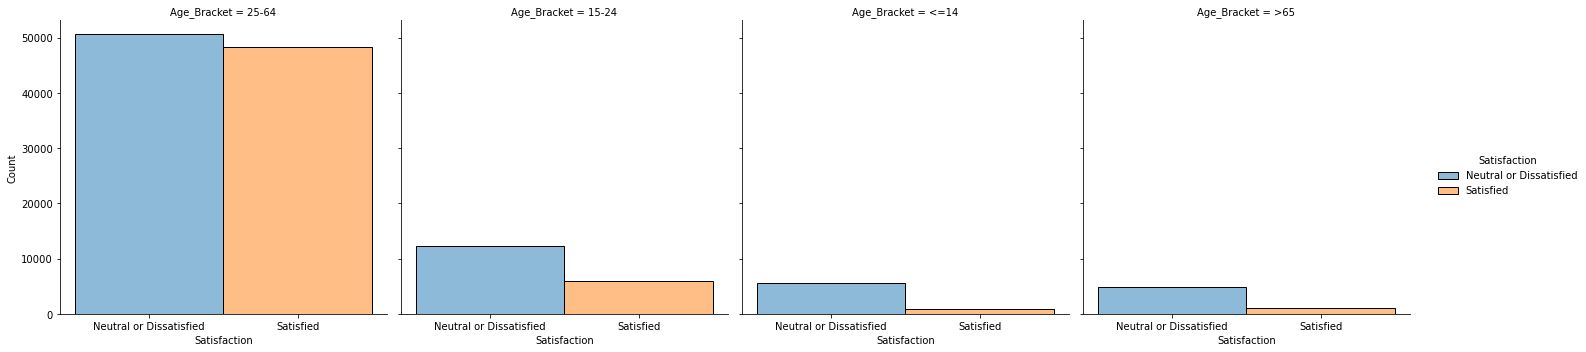

In [12]:
# Relationship between satisfaction and age bracket
# sns.countplot(data=airlines_df, x="Satisfaction")
sns.displot(airlines_df, x='Satisfaction', kind='hist', col='Age_Bracket', kde=False, hue="Satisfaction");

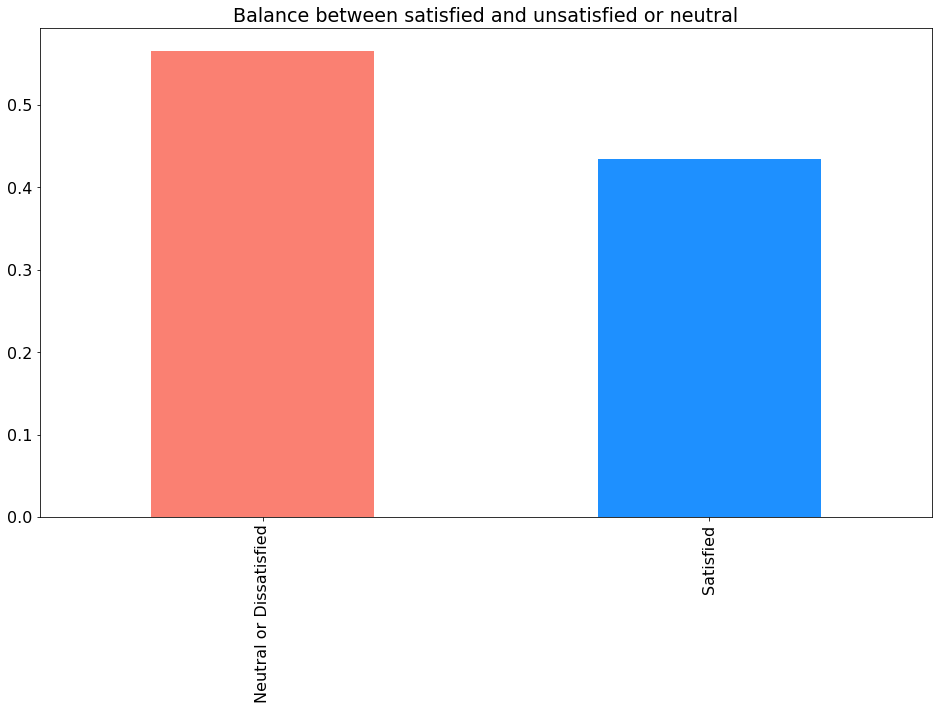

In [13]:
# Balance between satisfied and unsatisfied customers
plt.rcParams['font.size'] = '16'
fix, ax = plt.subplots(figsize=(16,9))
ax.axes = airlines_df['Satisfaction'].value_counts(normalize=True).plot(kind="bar", color=['salmon', 'dodgerblue'])
plt.title("Balance between satisfied and unsatisfied or neutral");

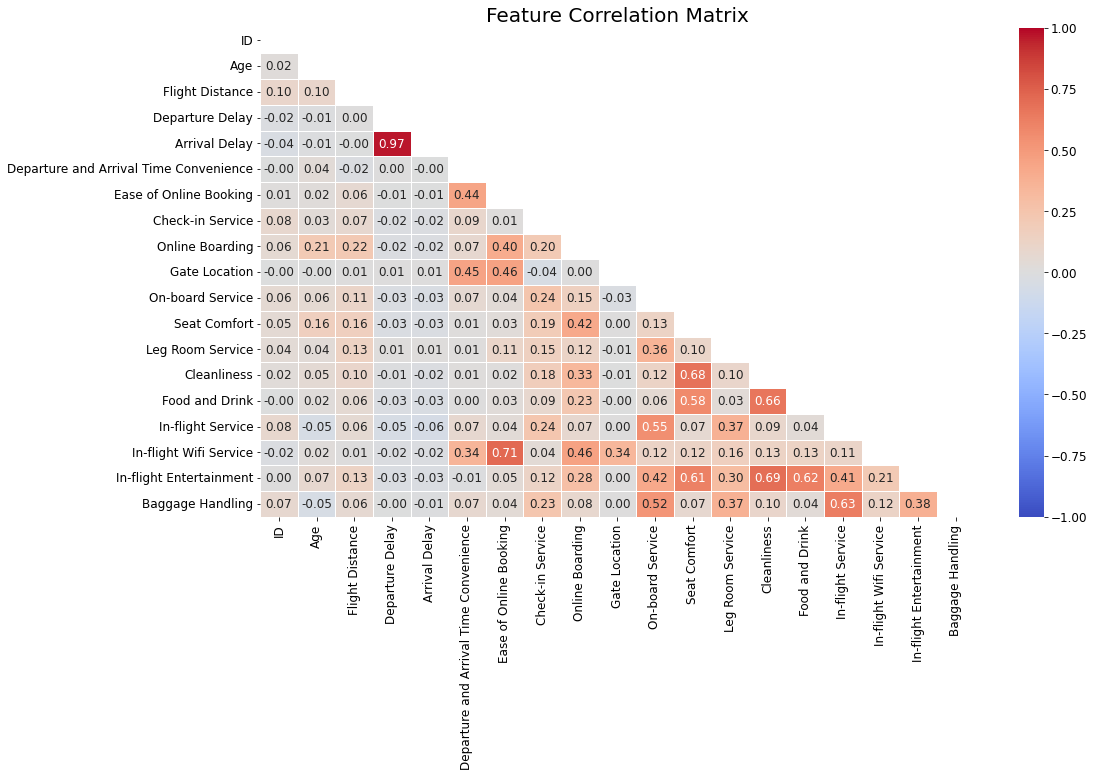

In [14]:
mask = np.zeros_like(airlines_df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(16,9))
plt.rcParams['font.size'] = '12'
plt.title("Feature Correlation Matrix", fontsize=20)
sns.heatmap(airlines_df.corr(), annot=True, mask=mask, linewidths=.5, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm');

# Interactive EDA

In [15]:
# Setting up a datagrid
grid = ipydatagrid.DataGrid(airlines_df)

# Some theming to add some color
cotton_candy = {
    "background_color": "rgb(255, 245, 251)",
    "header_background_color": "rgb(207, 212, 252, 1)",
    "header_grid_line_color": "rgb(0, 247, 181, 0.9)",
    "vertical_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "horizontal_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "selection_fill_color": "rgb(212, 245, 255, 0.3)",
    "selection_border_color": "rgb(78, 174, 212)",
    "header_selection_fill_color": "rgb(212, 255, 239, 0.3)",
    "header_selection_border_color": "rgb(252, 3, 115)",
    "cursor_fill_color": "rgb(186, 32, 186, 0.2)",
    "cursor_border_color": "rgb(191, 191, 78)",
}

grid.grid_style = cotton_candy

In [16]:
# Define widgets and variables
numerical_cols = airlines_df.select_dtypes([int, float]).columns.tolist()
age_range = (airlines_df['Age'].min(), airlines_df['Age'].max())
columns_index = {k:grid._column_name_to_index(k) + 1 for k in airlines_df.columns}
range_slider = widgets.IntRangeSlider(min=age_range[0], max=age_range[1], value=age_range, description="Age Range")
gender_dropdown = widgets.Dropdown(options=airlines_df['Gender'].unique().tolist() + ["Both"], 
                                   value="Both", layout={"width":"200px"}, description="Gender")
scatter_x_dropdown = widgets.Dropdown(options=numerical_cols, 
                                      value=numerical_cols[2], layout={"width":"250px"}, description="Scatter X-Axis")
scatter_y_dropdown = widgets.Dropdown(options=numerical_cols, value=numerical_cols[1], 
                                      layout={"width":"250px"}, description="Scatter Y-Axis")

# Chart
sc_x = bqp.LinearScale()
sc_y = bqp.LinearScale()
scatt = bqp.ScatterGL(
    x=airlines_df[scatter_x_dropdown.value].values,
    y=airlines_df[scatter_y_dropdown.value].values,
    names=np.arange(10),
    scales={"x": sc_x, "y": sc_y},
    colors=["limegreen", "purple"],
)
ax_x = bqp.Axis(scale=sc_x, label=scatter_x_dropdown.value)
ax_y = bqp.Axis(scale=sc_y, orientation="vertical", tick_format="d", label=scatter_y_dropdown.value)
fig = bqp.Figure(marks=[scatt], axes=[ax_x, ax_y], padding_x=0.025, interaction=bqp.interacts.PanZoom(scales={'x': [sc_x], 'y': [sc_y]}),
                 title="Select axes from the dropdown boxes!")


# Event handlers
def filter_gender(e):
    with grid.hold_sync():
        selected_gender = e.get("new")
        if selected_gender == "Both":
            grid._transforms = list(filter(lambda x: x['columnIndex'] != columns_index.get("Gender"), grid._transforms))
            return 

        grid.transform([
            {"type": "filter", "operator": "=", "columnIndex": columns_index.get("Gender"), "value": selected_gender},
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': range_slider.value}
        ])
        update_scatter_chart(None)
    
def filter_age(e):
    with grid.hold_sync():
        age_tuple = e.get("new")
        grid.transform([
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': age_tuple}
        ])
        update_scatter_chart(None)
    
def update_scatter_chart(e):
    with scatt.hold_sync():
        data = grid.get_visible_data()
        scatt.x = data[scatter_x_dropdown.value].values
        scatt.y = data[scatter_y_dropdown.value].values
        sc_x.min = float(data[scatter_x_dropdown.value].min())
        sc_x.max = float(data[scatter_x_dropdown.value].max())
        sc_y.min = float(data[scatter_y_dropdown.value].min())
        sc_y.max = float(data[scatter_y_dropdown.value].max())
        ax_x.label = scatter_x_dropdown.value
        ax_y.label = scatter_y_dropdown.value
        fig.title = f"{scatter_x_dropdown.value} vs. {scatter_y_dropdown.value}"
    
    
gender_dropdown.observe(filter_gender, names=['value'])
range_slider.observe(filter_age, names=['value'])
scatter_x_dropdown.observe(update_scatter_chart, names=["value"])
scatter_y_dropdown.observe(update_scatter_chart, names=["value"])


# Rendering the grid and widgets
widgets.VBox([
    widgets.HTML(value="<h1>Airline Passengers Data Explorer</h1>"),
    widgets.HBox([
        range_slider, gender_dropdown, scatter_x_dropdown, scatter_y_dropdown
    ], layout=widgets.Layout(flex='1 1 auto', width='100%')),
    grid,
    fig
])

# Machine Learning / Modelling

In [17]:
from sklearn.model_selection import train_test_split

Before we start train/test splitting, we need to reason about the kind of analysis we want to do, and whether the data, in its current form, is suitable.
The obvious target for this dataset, given we're dealing with passenger satisfaction with a given airline, would be to to predict whether a potential
passenger would be satisfies or neutral/unsatisfied given some paramaters like their age, sex, travel class, flight delay etc.

This type of analysis lends itself nicely to Logistic Regression, which could be the ideal model to use for this analysis, with this dataset.
To use logistic regression, we are likely going to need to One-Hot Encode categorical series so they're represented as numbers.

In [18]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

It's possible to see that we have quite a few columns which contain categorical data, with them ost crucial column being the predicted column.

In [19]:
# Columns with categorical data
airlines_df.select_dtypes(["object"]).head(3)

,Gender,Customer Type,Type of Travel,Class,Satisfaction,Age_Bracket
0,Male,First-time,Business,Business,Neutral or Dissatisfied,25-64
1,Female,Returning,Business,Business,Satisfied,25-64
2,Male,Returning,Business,Business,Satisfied,25-64


Below, we create a new dataframe which has all categorical values encoded to integers.
We will use that dataframe to train and test our models.

In [20]:
from sklearn.preprocessing import LabelEncoder

# Function to retrieve the string to integer mapping used in One-Hot encoding
def get_encoding_mapping(encoded_series, types):
    return dict(zip(encoded_series.classes_, encoded_series.transform(types)))

# Creating a copy of the airlines dataframe, as we will encode and replace 
# categorical columns with their numerical equivalents
airlines_df_encoded = airlines_df.copy()

# Mapping dictionary to convert back from encoding to string - will be used later!
enc_mappings = []

for col in airlines_df_encoded.select_dtypes(["object"]).columns:
    # One-Hot encoding categorical columns
    cur_series = airlines_df_encoded[col]
    col_enc = LabelEncoder()
    col_enc.fit(cur_series)
    col_unique_vals = cur_series.unique().tolist()
    enc_mappings.append(get_encoding_mapping(col_enc, col_unique_vals))
    airlines_df_encoded[col] = col_enc.transform(cur_series)

In [21]:
# Checking the conversion succeeded
airlines_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  int64  
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  int64  
 4   Type of Travel                          129487 non-null  int64  
 5   Class                                   129487 non-null  int64  
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

In [22]:
# The 'ID' columns is unlikely to be useful for our model, so we will drop it.
airlines_df_encoded = airlines_df_encoded.drop('ID', axis=1)

Our data is now in the right shape to be used as an input to a ML model! Recall that some columns had
very high positive/negative correlation. We should keep an eye on those and potentially drop some of
them as inputs so that we reduce the amount of multicollinearity in the model.

<AxesSubplot:>

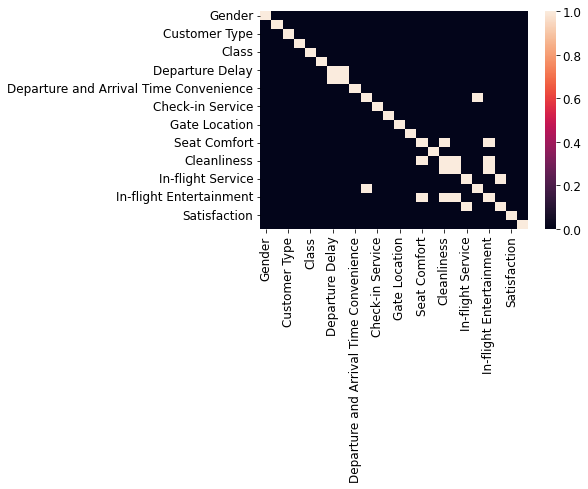

In [23]:
corr_threshold = 0.6
sns.heatmap(airlines_df_encoded.corr().applymap(lambda col: 1 if (col > corr_threshold or col < -corr_threshold) else 0))

In [24]:
# Columns used to predict "Satisfaction"
feature_list = list(filter(lambda x: x != 'Satisfaction', airlines_df_encoded.columns.tolist()))
feature_list

['Gender',
 'Age',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Age_Bracket']

In [25]:
# Define regressor and regressand
y = airlines_df_encoded[['Satisfaction']]
X = airlines_df_encoded[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Sanity check everything looks okay
display(X_train.head(3))

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Age_Bracket
56176,0,21,1,1,1,1400,5,0.0,4,4,...,3,2,4,2,2,5,4,2,3,0
89346,0,60,0,0,1,1587,0,11.0,1,1,...,3,2,3,2,2,3,1,2,3,1
31640,1,50,1,0,1,846,0,0.0,4,4,...,2,4,3,4,4,4,4,4,5,1


We're ready to instantiate and fit our model now! But before we do that, it would be good to define a helper function which
can standardise the way we fit, train and score our models. This will reduce code duplication and the potential for operational

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, roc_auc_score, classification_report

def run_model(model, X_train, X_test, y_train, y_test, print_results=True):
    # Convert to 1D arrays as some of the sklearn functions require them    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    # Fit our and train our model     
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    if print_results:
        print(f"Accuracy:{accuracy}, ROC AUC: {roc_auc}")
        print(classification_report(y_test,y_pred,digits=5))
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
        cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax1)
        rocd = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax2)
    
    return model, accuracy, roc_auc

Accuracy:0.8740960894900658, ROC AUC: 0.8697531830129747
              precision    recall  f1-score   support

           0    0.87757   0.90316   0.89018     24143
           1    0.86927   0.83635   0.85249     18588

    accuracy                        0.87410     42731
   macro avg    0.87342   0.86975   0.87134     42731
weighted avg    0.87396   0.87410   0.87379     42731



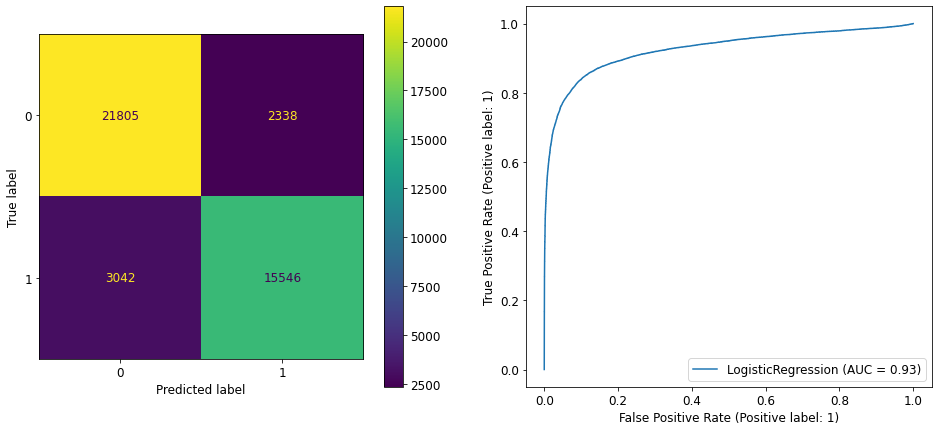

In [28]:
# Running our model (using a higher number of iteration to maximize chance of model convergence)
model, accuracy, roc_auc = run_model(LogisticRegression(max_iter=4000), X_train, X_test, y_train, y_test);

Some additional statistics. Looking into the regression model and determining which features are important and affect our regression

In [29]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.394624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                86756
Model:                          Logit   Df Residuals:                    86733
Method:                           MLE   Df Model:                           22
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                  0.4235
Time:                        01:22:20   Log-Likelihood:                -34236.
converged:                       True   LL-Null:                       -59382.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender                                    -0.2032   

#### Naive Bayes

Accuracy:0.8578783552924106, ROC AUC: 0.8531235941297726
              precision    recall  f1-score   support

           0    0.86300   0.88970   0.87614     24143
           1    0.85074   0.81655   0.83329     18588

    accuracy                        0.85788     42731
   macro avg    0.85687   0.85312   0.85472     42731
weighted avg    0.85766   0.85788   0.85750     42731



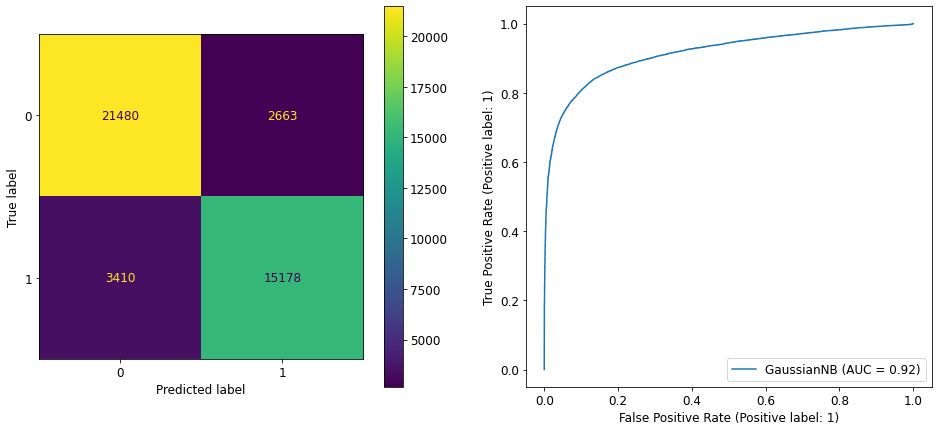

In [30]:
from sklearn.naive_bayes import GaussianNB

model, accuracy, roc_auc = run_model(GaussianNB(), X_train, X_test, y_train, y_test);

#### K-Neighbors

Accuracy:0.7496899206664951, ROC AUC: 0.7334048363170305
              precision    recall  f1-score   support

           0    0.74000   0.85868   0.79493     24143
           1    0.76814   0.60813   0.67884     18588

    accuracy                        0.74969     42731
   macro avg    0.75407   0.73340   0.73688     42731
weighted avg    0.75224   0.74969   0.74443     42731



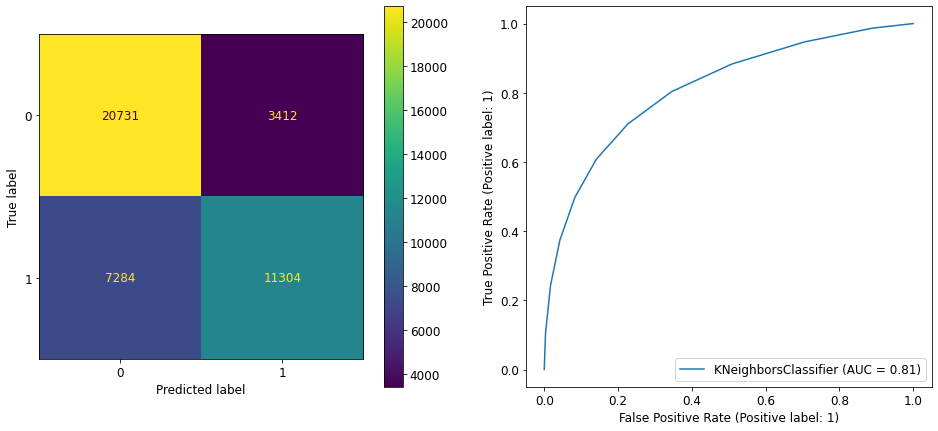

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model, accuracy, roc_auc = run_model(KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree", n_jobs=4), X_train, X_test, y_train, y_test);

#### Decision Tree Classifer

Accuracy:0.8971940745594533, ROC AUC: 0.8979550695718835
              precision    recall  f1-score   support

           0    0.92335   0.89210   0.90746     24143
           1    0.86576   0.90381   0.88437     18588

    accuracy                        0.89719     42731
   macro avg    0.89455   0.89796   0.89591     42731
weighted avg    0.89830   0.89719   0.89741     42731



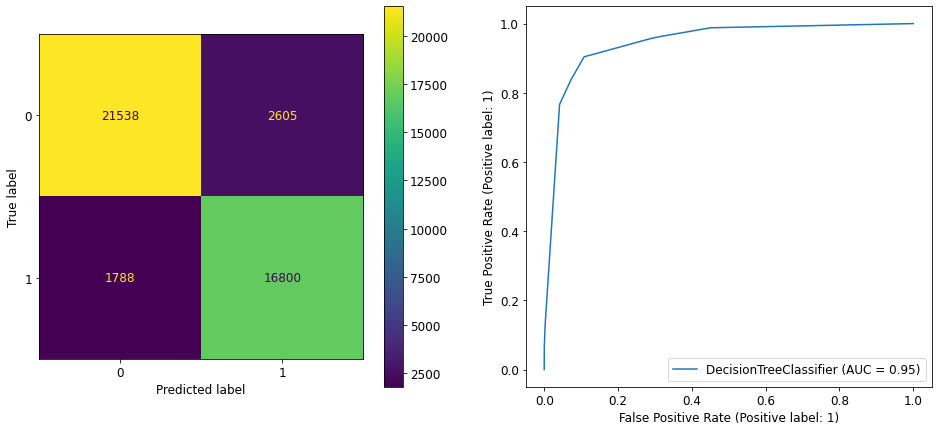

In [32]:
from sklearn.tree import DecisionTreeClassifier

model, accuracy, roc_auc = run_model(DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=10), X_train, X_test, y_train, y_test, True);

We can visualize the tree

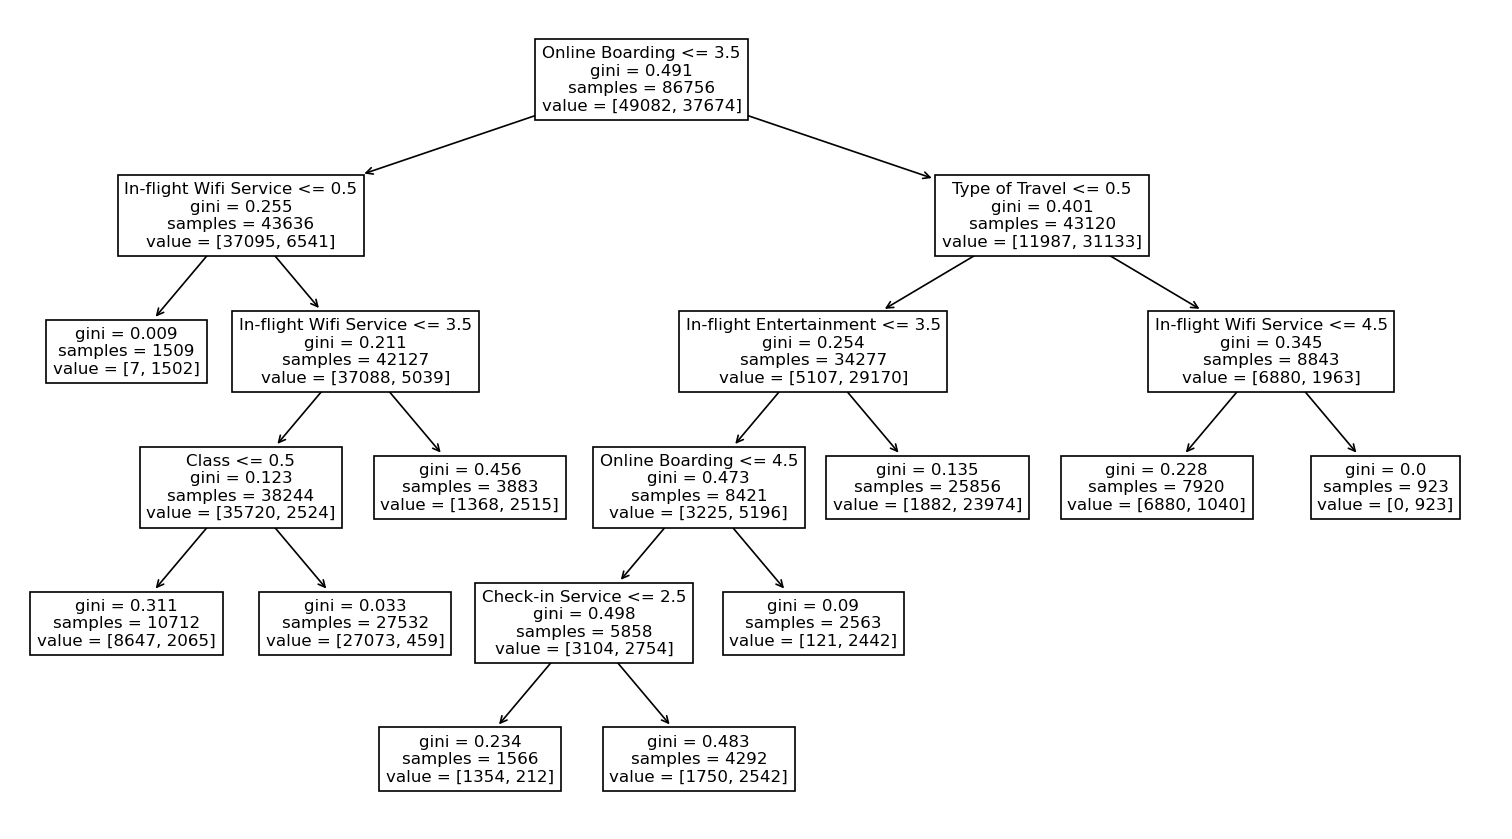

In [33]:
from sklearn import tree
plt.figure(figsize=(16,9), dpi=120)
tree.plot_tree(model, label='all', feature_names=feature_list, fontsize=10);

#### Neural Network

Accuracy:0.904682782991271, ROC AUC: 0.8941349842740407
              precision    recall  f1-score   support

           0    0.87136   0.97527   0.92039     24143
           1    0.96200   0.81300   0.88124     18588

    accuracy                        0.90468     42731
   macro avg    0.91668   0.89413   0.90082     42731
weighted avg    0.91079   0.90468   0.90336     42731



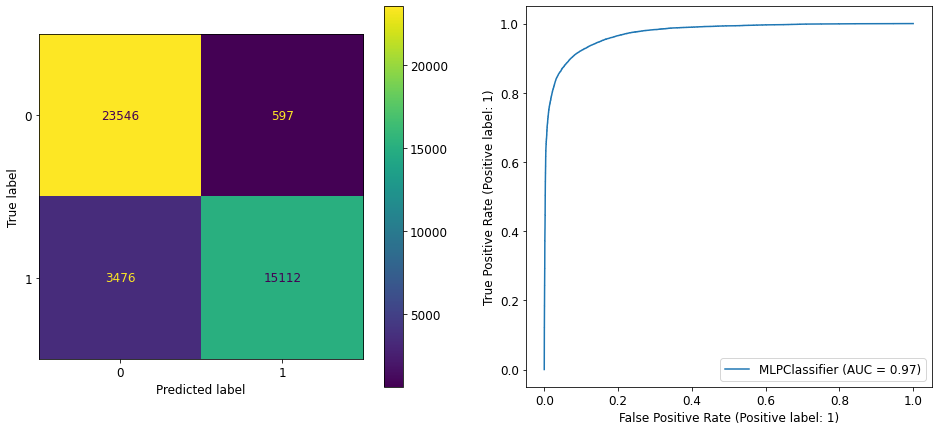

In [34]:
from sklearn.neural_network import MLPClassifier

model, accuracy, roc_auc = run_model(MLPClassifier(), X_train, X_test, y_train, y_test, True);

#### Random Forest

Accuracy:0.962790479979406, ROC AUC: 0.9605169035732782
              precision    recall  f1-score   support

           0    0.95708   0.97801   0.96743     24143
           1    0.97060   0.94303   0.95661     18588

    accuracy                        0.96279     42731
   macro avg    0.96384   0.96052   0.96202     42731
weighted avg    0.96296   0.96279   0.96272     42731



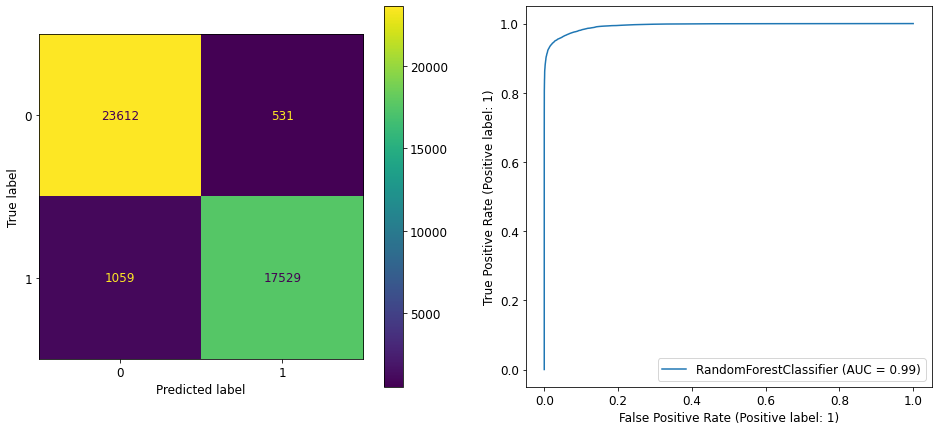

In [35]:
from sklearn.ensemble import RandomForestClassifier

model, accuracy, roc_auc = run_model(RandomForestClassifier(), X_train, X_test, y_train, y_test, True);

#### Adaptive Boosting

Accuracy:0.9285998455453885, ROC AUC: 0.9267442557512368
              precision    recall  f1-score   support

           0    0.93317   0.94102   0.93708     24143
           1    0.92255   0.91247   0.91748     18588

    accuracy                        0.92860     42731
   macro avg    0.92786   0.92674   0.92728     42731
weighted avg    0.92855   0.92860   0.92855     42731



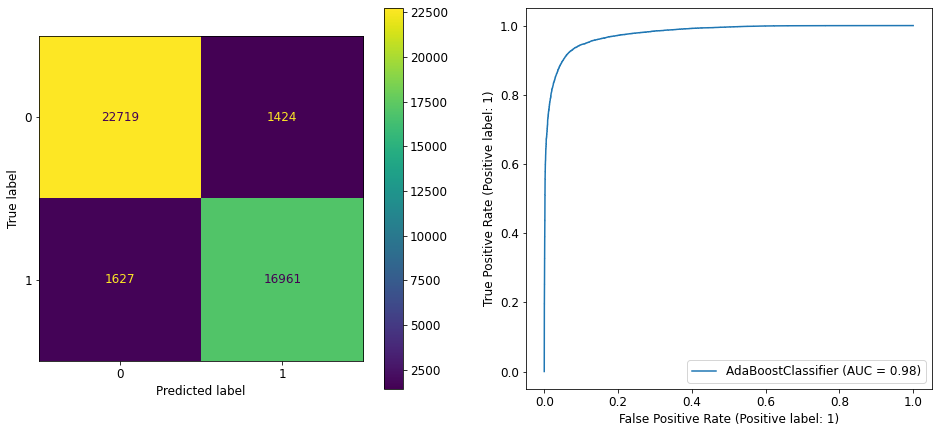

In [36]:
from sklearn.ensemble import AdaBoostClassifier

model, accuracy, roc_auc = run_model(AdaBoostClassifier(), X_train, X_test, y_train, y_test, True);